In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
sns.set_theme()

## Cargar dataset

In [2]:
# cargar dataset y mostrar primeras filas

# df = pd.read_csv('../data/audicion.csv', sep=';') # cambiar separador
df = pd.read_csv('audicion.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
# mostrar dimensiones de df
df.shape

(5000, 3)

In [4]:
# contar valores en test_result
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

## Análisis Exploratorio de Datos (EDA)

<Axes: xlabel='test_result', ylabel='count'>

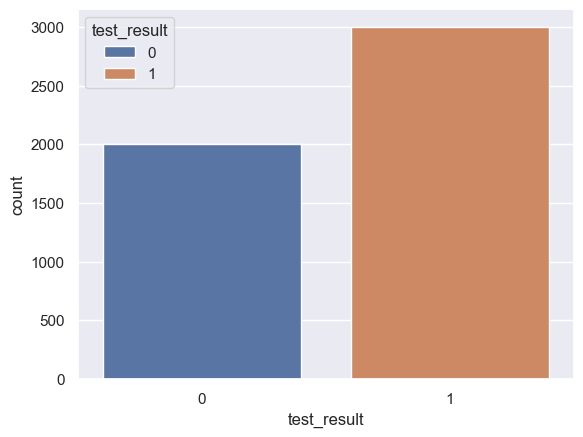

In [5]:
# gráfico conteo de test_result
sns.countplot(data=df, x='test_result', hue='test_result')

age                  Axes(0.125,0.11;0.227941x0.77)
physical_score    Axes(0.398529,0.11;0.227941x0.77)
test_result       Axes(0.672059,0.11;0.227941x0.77)
dtype: object

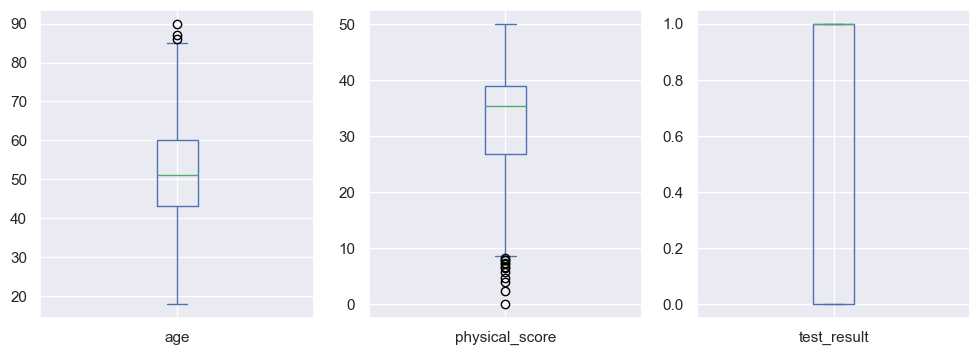

In [6]:
# gráfico boxplot de variables
df.plot(kind='box', subplots=True, figsize=(12,4))

<Axes: xlabel='test_result', ylabel='age'>

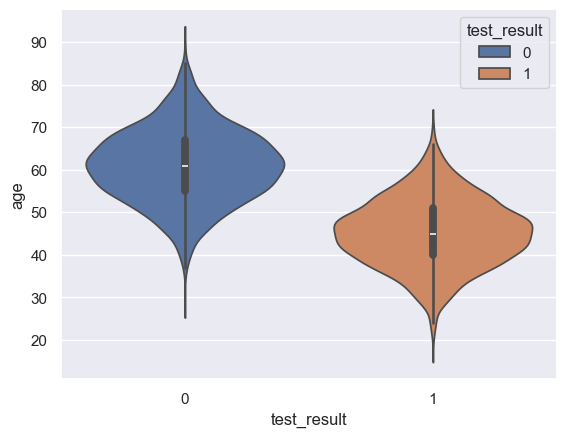

In [7]:
# gráfico violinplot de age según test_result
sns.violinplot(data=df, x='test_result', y='age', hue='test_result')

<Axes: xlabel='test_result', ylabel='age'>

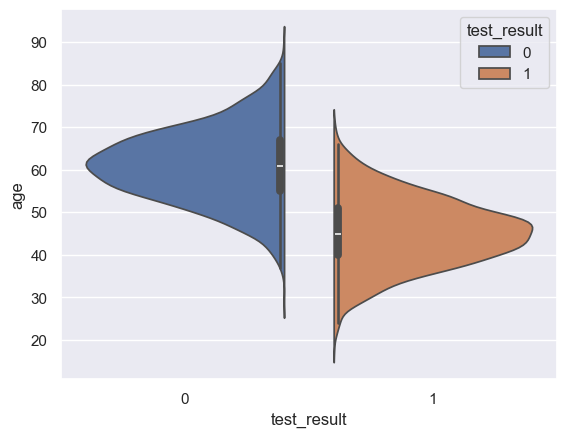

In [8]:
# gráfico violinplot de age según test_result sin mirror
sns.violinplot(data=df, x='test_result', y='age', hue='test_result', split=True)

<Axes: xlabel='age', ylabel='physical_score'>

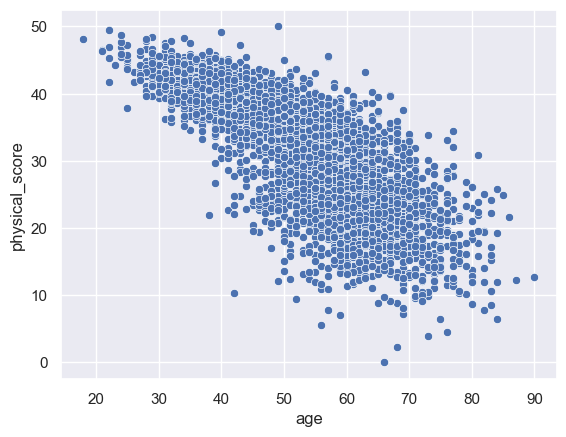

In [9]:
# gráfico scatterplot de age vs physical_score

# sns.scatterplot( x=df["age"], y=df["physical_score"] )
sns.scatterplot(data=df, x="age", y="physical_score")

<Axes: xlabel='age', ylabel='physical_score'>

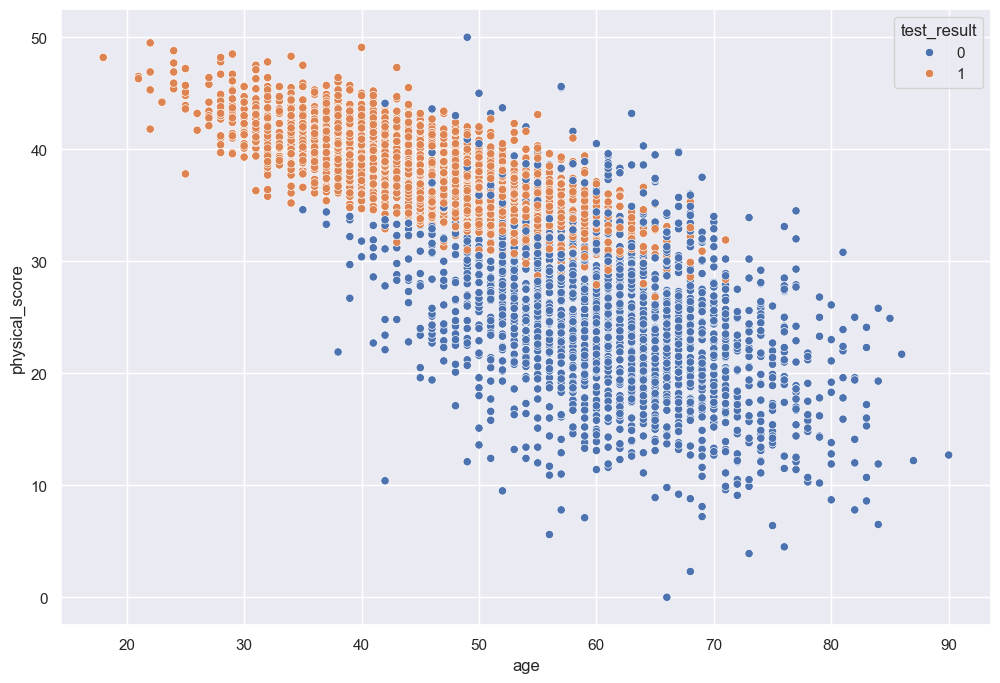

In [10]:
# gráfico scatterplot con color según test_result
plt.figure(figsize=(12, 8))
# sns.set(rc={"figure.figsize": (12,8)})
sns.scatterplot(data=df, x="age", y="physical_score", hue='test_result')

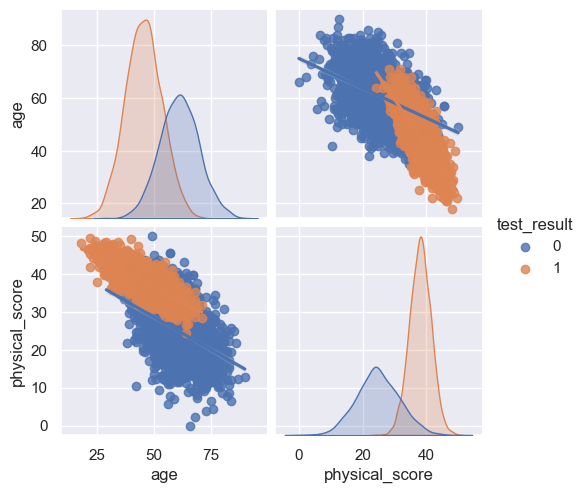

In [11]:
# gráfico pairplot con regresión
sns.pairplot(data=df, hue='test_result', kind='reg')

<Axes: >

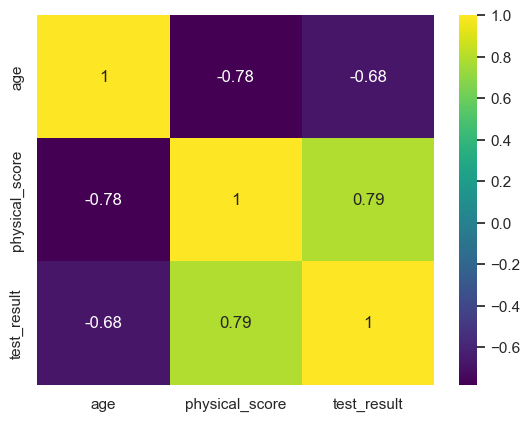

In [12]:
# gráfico mapa de calor con correlaciones
sns.heatmap(df.corr().round(2), cmap='viridis', annot=True)

## Modelado

In [13]:
# separar features y variable objetivo
X = df.drop('test_result', axis=1)
y = df['test_result']

In [14]:
# dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# entrenar modelo de regresión logística y predecir
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluación modelo

In [16]:
# calcular exactitud del modelo
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.897

In [17]:
# construir matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[326,  58],
       [ 45, 571]])

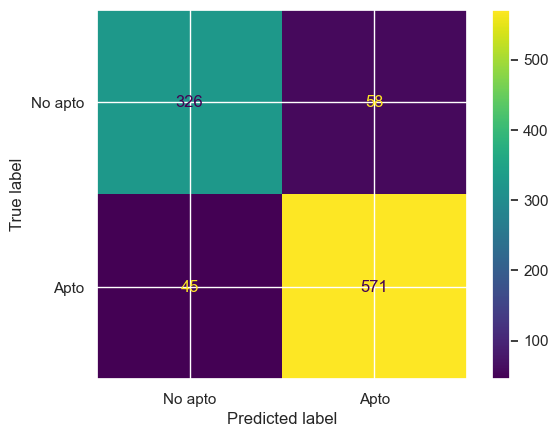

In [18]:
# gráfico matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No apto', 'Apto'])
disp.plot()
plt.show()

In [19]:
# calcular métricas adicionales
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("recall (Sensitivity): ", recall_score(y_test, y_pred))
print("recall (Specificity): ", recall_score(y_test, y_pred, pos_label=0))
print("F1-score: ", f1_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

accuracy:  0.897
precision:  0.9077901430842608
recall (Sensitivity):  0.926948051948052
recall (Specificity):  0.8489583333333334
F1-score:  0.9172690763052209
AUC:  0.8879531926406926


![alt text](<Captura de pantalla 2025-01-30 203047.png>) ![alt text](<Captura de pantalla 2025-01-30 203409.png>) ![alt text](<Captura de pantalla 2025-01-30 203852.png>) ![alt text](<Captura de pantalla 2025-01-30 204122.png>) ![alt text](<Captura de pantalla 2025-01-30 204900.png>) ![alt text](<Captura de pantalla 2025-01-30 210058.png>)

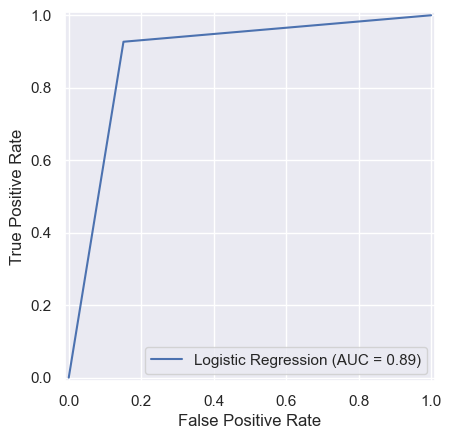

In [20]:
# gráfico curva ROC
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')

display.plot()

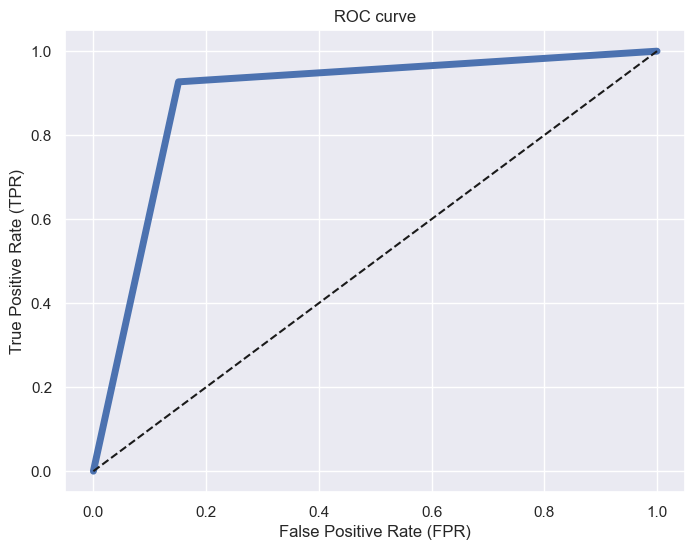

In [21]:
# personalizar curva ROC manualmente
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=5)
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()